In [1]:
import yfinance as yf

# Define the start and end dates
start_date = '2010-01-01'
end_date = '2020-12-31'

# Fetch S&P 500 data
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [2]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'sp500_data' is a DataFrame with adjusted closing prices
result = adfuller(sp500_data['Adj Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: 0.46129671223919805
p-value: 0.9836480360629762


In [9]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols for USD Index and S&P 500
usd_index_symbol = "DX-Y.NYB"  # USD Index ticker on Yahoo Finance
sp500_symbol = "^GSPC"  # S&P 500 index ticker on Yahoo Finance

# Define the date range for the data
start_date = "2010-01-01"
end_date = "2020-12-31"

# Fetch data for USD Index
usd_index_data = yf.Ticker(usd_index_symbol)
usd_index_data = usd_index_data.history(start=start_date, end=end_date, interval="1d")

# Fetch data for S&P 500
sp500_data = yf.Ticker(sp500_symbol)
sp500_data = sp500_data.history(start=start_date, end=end_date, interval="1d")

# Resample data to quarterly frequency (OHLCV data)
usd_index_data_quarterly = usd_index_data['Close'].resample('Q').ohlc()
sp500_data_quarterly = sp500_data['Close'].resample('Q').ohlc()

# Create a DataFrame for USD Index and S&P 500 quarterly data
quarterly_data = pd.concat([usd_index_data_quarterly, sp500_data_quarterly], axis=1)
quarterly_data.columns = ["USD_Open", "USD_High", "USD_Low", "USD_Close", "S&P500_Open", "S&P500_High", "S&P500_Low", "S&P500_Close"]

# Export the data to a CSV file
quarterly_data.to_csv("usd_sp500_quarterly_data.csv")


<AxesSubplot:xlabel='Date'>

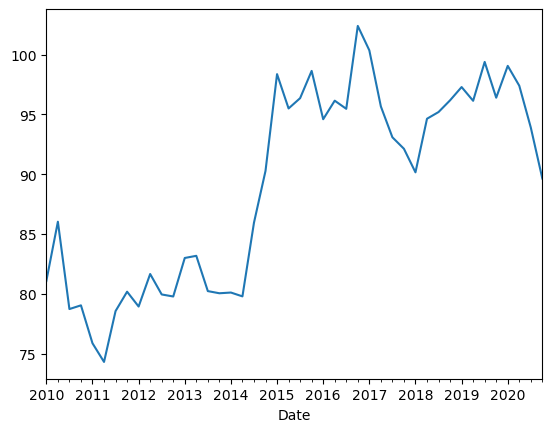

In [12]:
quarterly_data.USD_Close.plot()

In [14]:
from statsmodels.tsa.stattools import coint

# Assuming 'fundamental_data' is a DataFrame with the fundamental variables
cointegration_test = coint(quarterly_data.USD_Close, quarterly_data['S&P500_Close'])
if cointegration_test[1] < 0.05:
    print('Cointegration exists.')
else:
    print('No cointegration.')


No cointegration.
